# <font color=blue> Linear Regression Assignment - BoomBikes 

## <font color=green> Problem Statement

- BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.


- Need to find a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 


- They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- <font color=blue>***They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:***</font><br>
    **1. Which variables are significant in predicting the demand for shared bikes.**<br>
    **2. How well those variables describe the bike demands**

## <font color=green> Steps to be followed :

1. Understanding and analysing the data

2. Data Preprocessing

3. Training the model

4. Residual analysis

5. Model Evaluation

## <font color=green> Understanding and analysing the data

###  <font color=brown>Importing the needful libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

###  <font color=brown>Data Understanding

<font color=blue> ***Dataset Characteristics***</font>

=========================================	

- day.csv have the following fields:
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit :
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered	

In [2]:
# Reading the data 
df = pd.read_csv("day.csv")

In [3]:
# Checking the top 5 data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the information of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking the description of the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking the shape of the dataset 
df.shape

(730, 16)

## <font color=green> Data Preprocessing

### <font color=brown>Dealing with Numerical variables

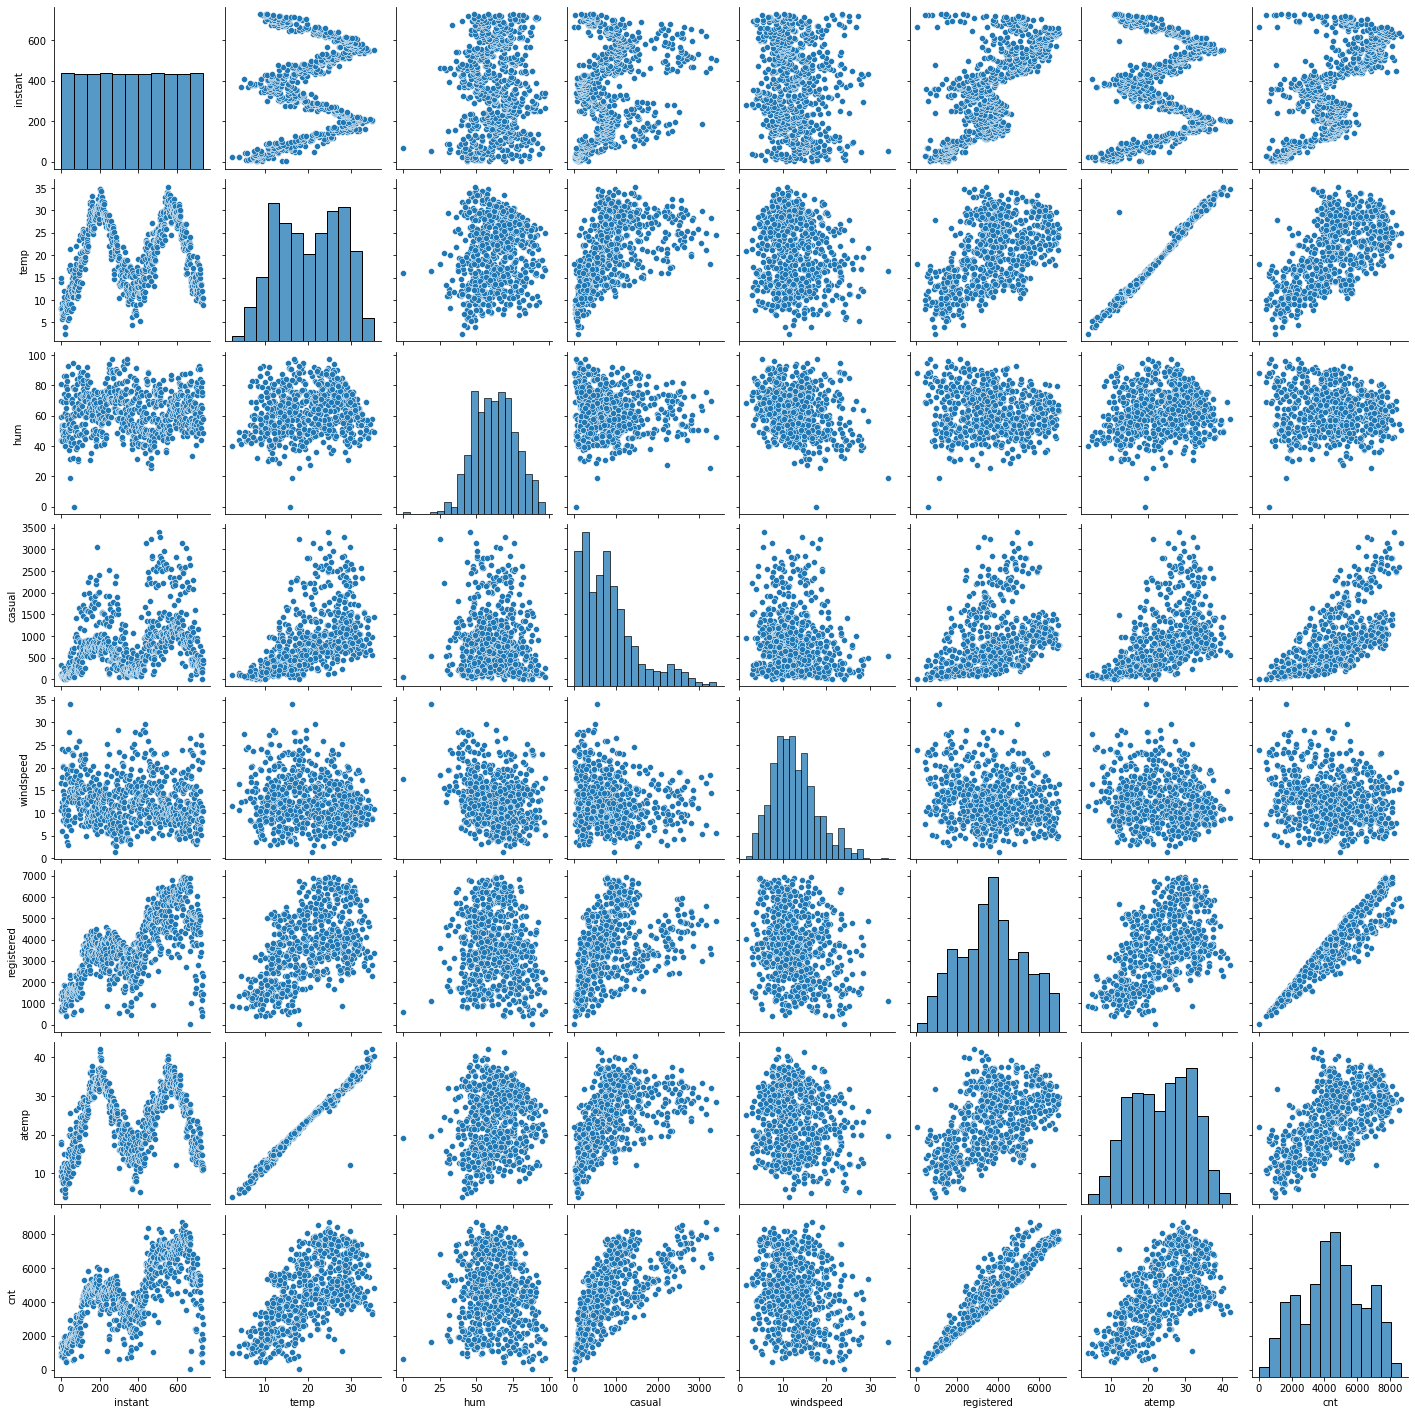

In [7]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(df, vars=["instant","temp", "hum","casual","windspeed","registered","atemp","cnt"])
plt.show()

<AxesSubplot:>

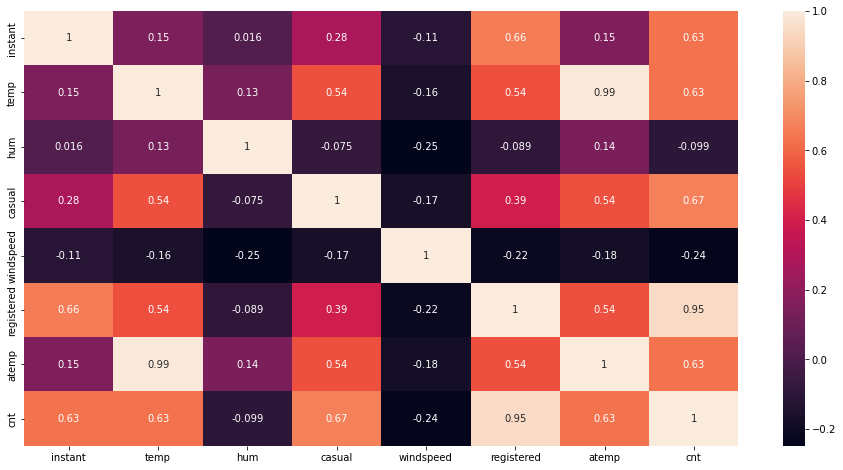

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(df[["instant","temp", "hum","casual","windspeed","registered","atemp","cnt"]].corr(),annot=True)

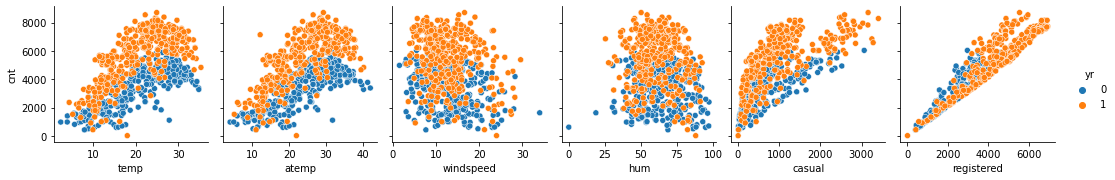

In [9]:
sns.pairplot(df, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'],hue ='yr')
plt.show()

###### <font color=blue>Interpretation from above plots :</font>

1. There is strong correlation between feature "temp" and "atemp" : so one of them can dropped
    
    
2. There is strong correlation between "temp" and target varibale "cnt"

    
3. There is strong correlation between "registered" and target varibale "cnt"

    
4. There is strong correlation between "casual" and target varibale "cnt"

    
5. There is strong correlation between "instant" and target varibale "cnt"


- We will further analyse whether these are important for our analysis

###  <font color=brown>Dealing with categorical variables

- We have following categirical variables:
    - season
    - weekday
    - mnth : Month
    - weathersit
    
    
- ***These already in the numirical format, but as they are not the ordinal varibles so we have to convert these into dummy varibales***

##### Mapping categorical varibales

In [10]:
df["season"] = df["season"].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


***visualizing the categorical variables of the dataset using boxplot***

In [ ]:
plt.figure(figsize=(24, 18))

# Significance of feature "season" with the target variable "cnt" 
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)

# Significance of feature "mnth" with the target variable "cnt" 
plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=df)

# Significance of feature "weekday" with the target variable "cnt" 
plt.subplot(3, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=df)

# Significance of feature "weathersit" with the target variable "cnt" 
plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)

# Significance of feature "yr" with the target variable "cnt" 
plt.subplot(3, 3, 5)
sns.boxplot(x='yr', y='cnt', data=df)

# Significance of feature "workingday" with the target variable "cnt" 
plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=df)

# Significance of feature "holiday" with the target variable "cnt" 
plt.subplot(3, 3, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

##### <font color=blue>Some of the observations from the plots above are as follows:</font>

1. <b>"Season" Vs "cnt" :</b> 
    - People are more likely to rent bikes in the summer and the fall season
    - Comparatively low in spring season


2. <b>"mnth" Vs "cnt" :</b>
    - Bike rental increasing after April and decreasing from October to December
    - Bike rental rates are the highest in September and October


3. <b>"weekday" Vs "cnt" :</b>
    - Comapratively not so much change on weekdays
    - Higher on Saturday amd Wednesday


4. <b>"weekday" Vs "cnt" :</b>
    - Most bike rents on clear weather and low when weather is light snow

    
5. <b>"yr" Vs "cnt" :</b>
    - Bike rent increased from 2018 to 2019


6. <b>"workingday" Vs "cnt" :</b>
    - There is no significant difference in bike rent on working day or not


7. <b>"holiday" Vs "cnt" :</b>
    - Bike rental rates low on holidays

###  <font color=brown>Adding dummy varibales for the categorical features

In [ ]:
# Creating dummy variables for the variables of month, weekday, weathersit, seasons
Month = pd.get_dummies(df.mnth, drop_first=True)
Weekday = pd.get_dummies(df.weekday, drop_first=True)
Weathersit = pd.get_dummies(df.weathersit, drop_first=True)
Season = pd.get_dummies(df.season, drop_first=True)

# Keeping drop first True, so that we can avoild one extra column

In [ ]:
Month.head()
# When all entries are zero then it will be April Month

In [ ]:
Weekday.head()
# When all entries are zero then it will be Tuesday

In [ ]:
Weathersit.head()
# When all entries are zero then it will be Clear weather

In [ ]:
Season.head()
# When all entries are zero then it will be fall season

In [ ]:
# We will add these dummy varibles to our dataframe and will remove the original varibale
df = pd.concat([df,Month, Weekday, Weathersit, Season], axis=1)
df.head(5)

In [ ]:
df.shape

In [ ]:
# Dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head()

In [ ]:
df.shape

###  <font color=brown>Data Cleaning

In [ ]:
# Checking for null values
df.isnull().sum()

###  <font color=brown>Removing the unnecessary columns

- Feature 'instant' is record index so it is not significant for the model
- Feature 'dteday' can be removed as there are other feature which explains the date 
- Feature 'atemp' can be removed as there is "temp" column which is similar
- Feature 'registered' can be removed as it is not significant
- Feature 'casual' can be removed as it is not significant
- 'cnt' is sum of casual and registered users 

In [ ]:
df = df.drop(['instant','dteday','atemp','registered','casual'],axis =1)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe().T

## <font color=green> Training the Model

###  <font color=brown>Splitting the Data into Training and Testing Sets

In [ ]:
df_train , df_test = train_test_split(df,train_size=0.7,random_state=100)

In [ ]:
df_train.shape

In [ ]:
df_test.shape

###  <font color=brown>Scaling the Variables

- Will rescale the numerical variables hum,temp,windspeed,cnt
- we can use MinMaxScaler() method

In [ ]:
df.describe().T

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

In [ ]:
# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [ ]:
# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

**We can see MinMax Scaling has been done: Minimum value is 0 for each of the Feature and Maximum value is 1 for all of the Feature**

###  <font color=brown>Preparing the training dataset

In [ ]:
y_train = df_train.pop("cnt") 

In [ ]:
x_train = df_train

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_train.head()

In [ ]:
y_train.head()

###  <font color=brown>Building Model using statsmodels

##### Model with only one variable "temp" variable

In [ ]:
#Adding the constant for the intercept as in sm by default the line passes through origin 
X_train_sm = sm.add_constant(x_train["temp"])

#Creating the Model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

#Checkin the parameters of the model
lr_model.params

In [ ]:
#Checking model summary 
lr_model.summary()

- ***Here R Square is 0.416 that means variable "temp" explains the 41.6% variance***

In [ ]:
# Line Visualization

plt.scatter(X_train_sm.iloc[:,1],y_train)
plt.plot(X_train_sm.iloc[:,1],0.6409*X_train_sm.iloc[:, 1] + 0.1690 ,'g');

##### Now, we will add one more variable "yr"

In [ ]:
#Adding the constant for the intercept as in sm by default the line passes through origin 
X_train_sm = sm.add_constant(x_train[["temp","yr"]])

#Creating the Model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

#Checkin the parameters of the model
lr_model.params

In [ ]:
#Checking model summary 
lr_model.summary()

- ***Here R Square is 0.692 that means variable "temp" and "yr" explains the 69.2% variance***

##### Now, we will calculate for all variables

In [ ]:
#building model with all variables
X_train_sm = sm.add_constant(x_train)

#Creating the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

#Checking the parameters
lr_model.params

In [ ]:
#Checking model summary 
lr_model.summary()

***R-squared is now .853 which means 85% of the variance in the count quantity is explained with all the variables***

###  <font color=brown>Building Model by using features selected by RFE

In [ ]:
# Checking the number of columns in our dataset
len(df.columns)

In [ ]:
# Creating the RFE Object
lm = LinearRegression()
lm.fit(x_train, y_train)


# Setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

# Fitting RFE object on our training dataset
rfe = rfe.fit(x_train, y_train)

In [ ]:
# Checking the elements selected and the ones rejected in a list
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Checking the selected feature variables by RFE
selected_rfe = x_train.columns[rfe.support_]
print(selected_rfe)
print(f"length : {len(selected_rfe)}")

In [ ]:
#creating training set with RFE selected variables
x_train_rfe = x_train[selected_rfe]

In [ ]:
#Adding the constant for the intercept as in sm by default the line passes through origin 
X_train_rfe = sm.add_constant(x_train_rfe)

#Creating the Model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

#Checkin the parameters of the model
lr_model.params

In [ ]:
#Checking model summary 
lr_model.summary()

###  <font color=brown>Checking the VIF to deal with multicollinearity problem

##### <font color=orange>How to check the conditions for variables elimination :</font>

- We check VIF and P-values so can have 3 conditions:
    1. Both are high : Need to be drop
    2. High-Low:
        - High p-value, low VIF : remove these first, then build model again and check VIF again      
        - Low p-value, high VIF : remove these later          
    3. Both are low : Keep variable

In [ ]:
# Dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [ ]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

In [ ]:
# "workingday" variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)

In [ ]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)
lr_model = lr.fit()

#summary
lr_model.summary()

In [ ]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [ ]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

In [ ]:
# "Sat" variable can be dropped due to Low VIF and High p-value
X_train_new_2 = X_train_lr1.drop(['Sat'], axis = 1)

In [ ]:
# Adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)
lr_model = lr.fit()

#Summary
lr_model.summary()

In [ ]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [ ]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

In [ ]:
#"hum" variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

In [ ]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)
lr_model = lr.fit()

#summary
lr_model.summary()

In [ ]:
#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [ ]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

<font color=blue>***Now VIF is not much greater than 5 and all varibale have low p values(<0.05),so we can take these variables for the final model***</font>

## <font color=green> Residual Analysis

###  <font color=brown>Looking For Normality

In [ ]:
X_train_lr3 = sm.add_constant(X_train_lr3)
X_train_lr3

In [ ]:
# Getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr3)

In [ ]:
# Calclualting residuals:
res = y_train - y_train_pred

#Distribution of the error terms
#Distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

***We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality***

###  <font color=brown>Looking For Patterns in the Residuals

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

***We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say
Error terms are independent of each other.*** 

###  <font color=brown>Looking for Constant Variance

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

***We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity***

## <font color=green> Model Evaluation

##### Scaling features on test dataset

- train dataset is to be fit, test dataset is not fit but simply transformed
- test dataset is transformed based on fit of train dataset

In [ ]:
#Perform scaling on test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
df_test.describe().T

In [ ]:
#Preparing the variables for model building 

y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_test.head(5)

In [ ]:
#dropping constant
X_train_lr3.drop(columns= 'const', inplace = True)

In [ ]:
# Creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr3.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

#making predictions
y_pred = lr_model.predict(X_test_new)

In [ ]:
#build a scatter plot to observe relationship between the dependent and the feature variables
sns.pairplot(df, y_vars='cnt', x_vars=X_train_lr3.columns)

##### We can now validate the assumptions of linear regression in the model:

- As we can see, temperature has a linear relationship with the dependent variable "cnt". 

- As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity. 

- The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

###  <font color=brown>Model evaluation on test data

In [ ]:
# R2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

In [ ]:
#R2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [ ]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

***Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets***

**1. Which variables are significant in predicting the demand for shared bikes.**<br>
**2. How well those variables describe the bike demands**

- The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

- The R-squared value of the train set is 84.13% whereas the test set has a value of 79.48% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model. 

- Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.  



- <font color=blue>***Insights :***</font>


- ***Temperature is the Most Significant Feature which affects the Business positively*** 


- ***Whereas  the other Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively***


- ***Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining*** 



- ***The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season*** 


- ***It is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days*** 


- ***Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business*** 
